In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [337]:
df=pd.read_csv('weight-height.csv')

In [338]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [339]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()

In [340]:
dummy=pd.get_dummies(df1['Gender'])

In [341]:
dummy.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [342]:
dummy1=pd.get_dummies(df['Gender'],drop_first=True,prefix='Dummy')

In [343]:
dummy1.head()

,Dummy_Male
0,1
1,1
2,1
3,1
4,1


In [344]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [345]:
df2.drop('Gender',axis='columns',inplace=True)

In [346]:
df3=pd.concat([df2,dummy1],axis=1)

In [347]:
df3.head()

,Height,Weight,Dummy_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [348]:
y=df3['Weight']

In [349]:
x=(df3[['Dummy_Male','Height']])

In [350]:
from sklearn.model_selection import train_test_split

In [351]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30)

# Using Linear Regression

In [352]:
from sklearn import linear_model

In [353]:
reg=linear_model.LinearRegression()

In [354]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [355]:
x.head()

,Dummy_Male,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [356]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [357]:
reg.predict([[1,73.847]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([215.97335158])

In [358]:
from sklearn.metrics import mean_squared_error 

In [359]:
pred=reg.predict(xtest)

In [360]:
mse=mean_squared_error(ytest,pred)

In [361]:
mse

96.73539465883235

In [362]:
from sklearn.metrics import mean_absolute_error

In [363]:
mae=mean_absolute_error(ytest,pred)

In [364]:
mae

7.789740790147246

In [365]:
df5=df.copy()

In [366]:
df4.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [367]:
dummy1.head()

,Dummy_Male
0,1
1,1
2,1
3,1
4,1


In [368]:
df4.drop('Gender',axis='columns',inplace=True)

In [369]:
df5=pd.concat([df4,dummy1],axis=1)

In [370]:
y1=df3['Weight']

In [371]:
x1=(df3[['Dummy_Male','Height']])

In [372]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=.30)

# Using K-NN Regressor

In [373]:
from sklearn.neighbors import KNeighborsRegressor

In [374]:
neigh=KNeighborsRegressor(n_neighbors=11)

In [375]:
neigh.fit(x1,y1)

KNeighborsRegressor(n_neighbors=11)

In [376]:
A=neigh.kneighbors_graph(x1)

In [377]:
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [378]:
pred1=neigh.predict(x1test)

In [379]:
mse1=mean_squared_error(y1test,pred1)

In [380]:
mse1

92.47529423873627

In [381]:
mae1=mean_absolute_error(y1test,pred1)

In [382]:
mae1

7.591654724848956

In [383]:
x1.head()

,Dummy_Male,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [384]:
y1.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [385]:
neigh.predict([[1,73.847]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([222.44474842])

In [386]:
df5.head()

,Height,Weight,Dummy_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [387]:
df5

,Height,Weight,Dummy_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
8550,60.483946,110.565497,0
8551,63.423372,129.921671,0
8552,65.584057,155.942671,0
8553,67.429971,151.678405,0


In [390]:
df5['predicted results']=neigh.predict(x1)

In [391]:
df5

,Height,Weight,Dummy_Male,predicted results
0,73.847017,241.893563,1,222.444748
1,68.781904,162.310473,1,183.002236
2,74.110105,212.740856,1,215.185162
3,71.730978,220.042470,1,200.653051
4,69.881796,206.349801,1,195.729451
...,...,...,...,...
8550,60.483946,110.565497,0,117.180888
8551,63.423372,129.921671,0,134.001316
8552,65.584057,155.942671,0,150.005520
8553,67.429971,151.678405,0,157.791741


In [392]:
reg.predict([[0,60.921791]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([119.14591533])

# Using K-NN Classifier 

In [393]:
df6=df.copy()
df7=df.copy()
df8=df.copy()

In [394]:
df6.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [395]:
dummy1.head()

,Dummy_Male
0,1
1,1
2,1
3,1
4,1


In [396]:
df6.drop('Gender',axis='columns',inplace=True)

In [397]:
df7=pd.concat([df6,dummy1],axis=1)

In [398]:
df7.head()

,Height,Weight,Dummy_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [399]:
y2=df7['Dummy_Male']

In [400]:
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: Dummy_Male, dtype: uint8

In [401]:
x2=(df7[['Height','Weight']])

In [402]:
x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=.30)

In [403]:
from sklearn.neighbors import KNeighborsClassifier
neigh1=KNeighborsClassifier(n_neighbors=11)

In [404]:
neigh1.fit(x2,y2)

KNeighborsClassifier(n_neighbors=11)

In [405]:
neigh1.predict([[73.847017,241.893563]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

# Classification Report,Confusion Matrix, ROC,AUC and analysis 

In [406]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve

In [407]:
y_pred=neigh1.predict(x2test)

In [408]:
print(metrics.classification_report(y2test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1075
           1       0.94      0.94      0.94      1492

    accuracy                           0.93      2567
   macro avg       0.93      0.93      0.93      2567
weighted avg       0.93      0.93      0.93      2567



In [409]:
accuracy_score(y2test,y_pred)

0.9306583560576549

In [410]:
confusion_matrix(y2test,y_pred)

array([[ 981,   94],
       [  84, 1408]], dtype=int64)

In [411]:
tp,fn,fp,tn=confusion_matrix(y2test,y_pred).reshape(-1)

In [412]:
accuracy_n=(tp+tn)/(tp+fp+tn+fn)

In [413]:
accuracy_n

0.9306583560576549

In [414]:
ppv_n=tp/(tp+fn)
tpr_n=tp/(tp+fn)
fpr_n=fp/(fp+tn)
f1_measure_n=(ppv_n+tpr_n)/2
f1_score_n=(2*ppv_n*tpr_n)/(ppv_n+tpr_n)
tnr_n=tn/(tn+fp)
csi_n=tp/(tp+fn+fp)
fdr_n=fp/(tp+fp)

In [415]:
ppv_n

0.9125581395348837

In [416]:
tpr_n

0.9125581395348837

In [417]:
fpr_n

0.05630026809651475

In [418]:
f1_measure_n

0.9125581395348837

In [419]:
f1_score_n

0.9125581395348837

In [420]:
tnr_n

0.9436997319034852

In [421]:
csi_n

0.8464193270060397

In [422]:
fdr_n

0.07887323943661972

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


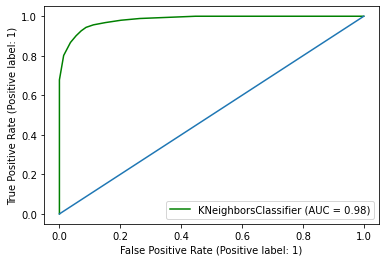

In [423]:
plot_roc_curve(neigh1,x2test,y2test,color='Green')
plt.plot([0,1],[0,1])